In [258]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

random_state = 22520109
np.random.seed(random_state)

#load data
data = pd.read_csv(r'fish.csv')
X0 = data.drop(columns = ['Weight'])
Y0 = data['Weight'].to_numpy()

# Y0 = Y0.reshape(Y0.shape[0], 1)

#scale data

# X0 = scale(X0)
# Y0 = scale(Y0)

mms = MinMaxScaler()
X0 = mms.fit_transform(X0)
Y0 = mms.fit_transform(Y0)
print(Y0.shape)
print(Y0)

# stds = StandardScaler()
# X0 = stds.fit_transform(X0)
# Y0 = stds.fit_transform(Y0)

#split
X, X_test, y, y_test = train_test_split(X0, Y0, test_size=0.3, random_state=22520109)




ValueError: Expected 2D array, got 1D array instead:
array=[ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.    40.    69.    78.    87.   120.
    0.   110.   120.   150.   145.   160.   140.   160.   169.   161.
  200.   180.   290.   272.   390.   270.   270.   306.   540.   800.
 1000.    55.    60.    90.   120.   150.   140.   170.   145.   200.
  273.   300.     5.9   32.    40.    51.5   70.   100.    78.    80.
   85.    85.   110.   115.   125.   130.   120.   120.   130.   135.
  110.   130.   150.   145.   150.   170.   225.   145.   188.   180.
  197.   218.   300.   260.   265.   250.   250.   300.   320.   514.
  556.   840.   685.   700.   700.   690.   900.   650.   820.   850.
  900.  1015.   820.  1100.  1000.  1100.  1000.  1000.   200.   300.
  300.   300.   430.   345.   456.   510.   540.   500.   567.   770.
  950.  1250.  1600.  1550.  1650.     6.7    7.5    7.     9.7    9.8
    8.7   10.     9.9    9.8   12.2   13.4   12.2   19.7   19.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [264]:
class LinRegGD:
    def __init__(self, eta=0.001, max_it = 200, random_state=22520109):
        self.eta = eta 
        self.max_it = max_it 
        self.random_state = random_state
        self.w = None 
        self.costs = []

    def predict(self, X):
        return (X @ self.w[1:]) + self.w[0]

    def fit(self, X, y):
        #init basic values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.w = self.w.reshape(self.w.shape[0], 1)        
        self.costs = []

        for it in range(self.max_it):
            h = self.predict(X)         # h: hypothesis


            h = h.reshape(h.shape[0], 1)   #fixing


            diff = y - h 


            print(np.dot(X.T, diff).shape) #fixing 2
            print(self.w[1:].shape)
            

            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)

            cost = np.sum(diff ** 2)/ (2 * X.shape[0])
            self.costs.append(cost)




In [265]:

#train with my model 
myGD = LinRegGD(eta = 0.0033, max_it = 200, random_state=22520109)
myGD.fit(X, y)
yGD = myGD.predict(X_test)

#import model 
from sklearn.linear_model import LinearRegression
SK = LinearRegression()
SK.fit(X,y)
ySK = SK.predict(X_test)

#Compare result
from sklearn.metrics import r2_score as r2 
print(round(r2(y_test, yGD), 5), myGD.w)
print(round(r2(y_test, ySK), 5), np.insert(SK.coef_, 0, SK.intercept_))


#visualize
plt.plot(range(1, len(myGD.costs) + 1), myGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('My Gradient Descent')
plt.show()

(5, 5)
(5, 1)


ValueError: non-broadcastable output operand with shape (5,1) doesn't match the broadcast shape (5,5)

In [239]:
#normal equation
pse_inv = np.linalg.inv(X.T @ X)
w = pse_inv @ X.T @ y
yNE = X_test @ w
print(round(r2(y_test, yNE), 5))

0.75445


<Axes: ylabel='Weight'>

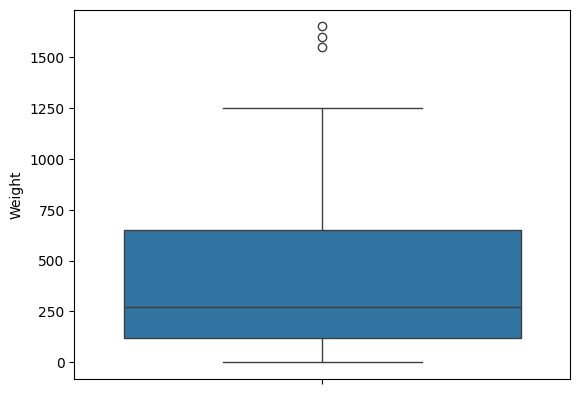

In [180]:
# sbn.boxplot(Y0)
sbn.boxplot(data['Weight'])